In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from lmfit import minimize, Parameters, Parameter, report_fit

In [2]:
mi= 0.015
CN=10
n=2
D_aTc=0.67*60
D_AHL=10
Nmax=200
Vecoli=10**(-9)
Vbead=10**(-3)
Vc=Vecoli/Vbead
d_aTc=0.034/60
d_mrnatetr=0.023*60
d_tetr=0.631
d_ahl=0.01
d_mrnaluxi=0.347
d_luxi=0.00167
d_cmplx=0.025
kA=0.04
k_min_one=4.2*10**(-4)
kd_cmplx=15*10**(-9)
kd_ptet=50*10**(-9)
k1=k_min_one/kd_cmplx
ptet=25.3*60*10**(-3)
p_105=30*60*10**(-3)
k_034=11*60*10**(-3)
t=np.linspace(0, 2000)     

In [3]:
def senders_model(x,t): 
    N=x[0]
    aTc_ext=x[1]
    aTc_int=x[2]
    TetR=x[3]
    cmplx=x[4]
    LuxI=x[5]
    AHL_int=x[6]
    AHL_ext=x[7]
    
    dNdt=mi*N*(1-(N/Nmax))
    daTc_extdt=D_aTc*N*(aTc_int-Vc*aTc_ext)-d_aTc*aTc_ext
    daTc_intdt=D_aTc*(Vc*aTc_ext-aTc_int)+k_min_one*cmplx-d_aTc*aTc_int-k1*aTc_int*TetR
    dTetRdt=(p_105*k_034*CN/d_mrnatetr)+k_min_one*cmplx-k1*TetR*aTc_int-d_tetr*TetR
    dcmplxdt=k1*TetR*aTc_int-k_min_one*cmplx-d_cmplx*cmplx
    dLuxIdt=(ptet*kluxi*CN/d_mrnaluxi)*((kd_ptet**n)/(kd_ptet**n + TetR**n )) - d_luxi*LuxI
    dAHL_intdt=kA*LuxI-d_ahl*AHL_int  +D_AHL*(Vc*AHL_ext-AHL_int)
    dAHL_extdt=D_AHL*N*(AHL_int-Vc*AHL_ext)-d_ahl*AHL_ext
    
    
    
    return [dNdt,daTc_extdt,daTc_intdt,dTetRdt,dcmplxdt,dLuxIdt,dAHL_intdt,dAHL_extdt]

30.313556545604957 5.0000000000000004e-08 0.14515188871937504 24043.732459720657


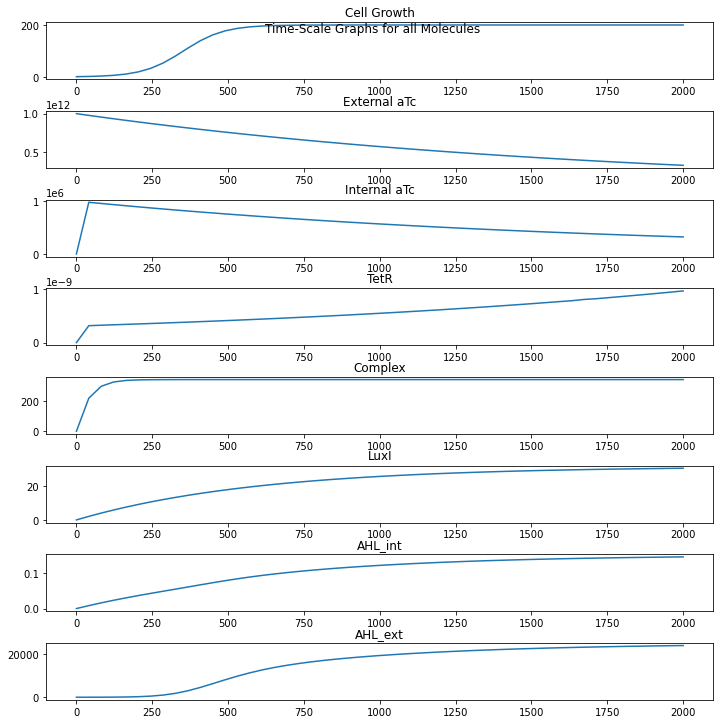

In [4]:
kluxi=0.2*60*10**(-4)
x0=[1,10**(12),0,0,0,0,0,0] #N-aTc_ext-aTc_int-TetR-LuxI-AHL_int-AHL_ext
solution=odeint(senders_model,x0,t)
fig,axs=plt.subplots(8,figsize=(10,10))
fig.tight_layout()
plt.suptitle('Time-Scale Graphs for all Molecules')
axs[0].plot(t,solution[:,0])
axs[0].set_title('Cell Growth')
axs[1].plot(t,solution[:,1])
axs[1].set_title('External aTc')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Internal aTc')
axs[3].plot(t,solution[:,3])
axs[3].set_title('TetR')
axs[4].plot(t,solution[:,4])
axs[4].set_title('Complex')
axs[5].plot(t,solution[:,5])
axs[5].set_title('LuxI')
axs[6].plot(t,solution[:,6])
axs[6].set_title('AHL_int')
axs[7].plot(t,solution[:,7])
axs[7].set_title('AHL_ext')
print(max(solution[:,5]),kd_ptet,max(solution[:,6]),max(solution[:,7]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


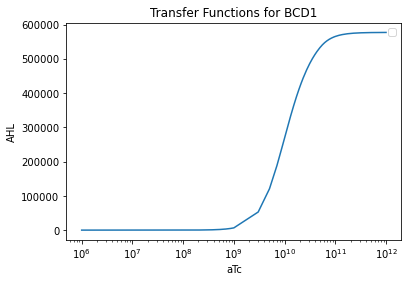

In [5]:
aTc_values_0=np.linspace(10**(6),10**(7))
aTc_values_1=np.linspace(10**(7),10**(9))
aTc_values_2=np.linspace(10**(9),10**(11))
aTc_values_3=np.linspace(10**(11),10**(12))
aTc_values=np.concatenate([aTc_values_0,aTc_values_1,aTc_values_2,aTc_values_3])
kluxi=4.8*60*10**(-4)
AHL_temp=[]
for i in range(200):
    x0=[1,aTc_values[i],0,0,0,0,0,0] #LuxR-Mon-Dim-mng
    solution=odeint(senders_model,x0,t)
    AHL_temp.append(max(solution[:,7]))
plt.semilogx(aTc_values,AHL_temp)
plt.xlabel('aTc')
plt.ylabel('AHL')
plt.legend()
plt.title('Transfer Functions for BCD1')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


577049.6048772408 0.028800000000000003


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


106994.61420434217 0.00534


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


34863.413588776086 0.00174


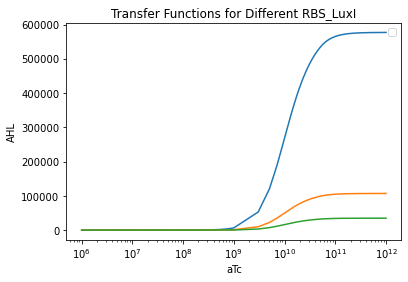

In [6]:
#parametric for different RBS

kluxi_arr=[4.8*60*10**(-4),0.89*60*10**(-4),0.29*60*10**(-4)]
aTc_values_0=np.linspace(10**(6),10**(7))
aTc_values_1=np.linspace(10**(7),10**(9))
aTc_values_2=np.linspace(10**(9),10**(11))
aTc_values_3=np.linspace(10**(11),10**(12))
aTc_values=np.concatenate([aTc_values_0,aTc_values_1,aTc_values_2,aTc_values_3])
#RBS_arr=[1,'medium','weak']
for j in range(3):
    kluxi=kluxi_arr[j]
    #RBS=RBS_arr[j]
    AHL_temp=[]
    for i in range(200):
        x0=[1,aTc_values[i],0,0,0,0,0,0] #LuxR-Mon-Dim-mng
        solution=odeint(senders_model,x0,t)
        AHL_temp.append(max(solution[:,7]))
    print(max(solution[:,7]),kluxi)
    plt.semilogx(aTc_values,AHL_temp)
    plt.xlabel('aTc')
    plt.ylabel('AHL')
    #plt.yscale('log')
    plt.legend()
plt.title('Transfer Functions for Different RBS_LuxI')
plt.show()